In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("titanic_train.csv")

In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Pre-Processing

In [6]:
gender = dataset["Sex"]

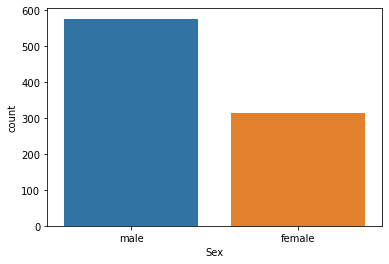

In [7]:
sns.countplot(gender)

In [8]:
survived = dataset["Survived"]

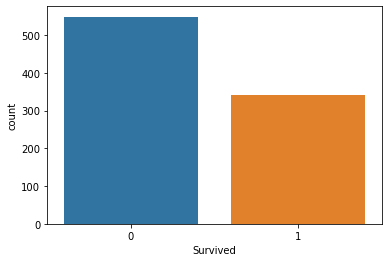

In [9]:
sns.countplot(survived)

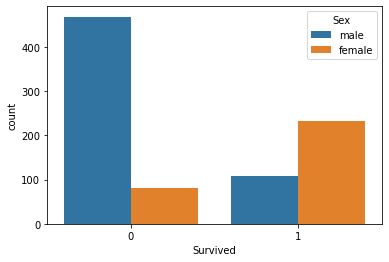

In [10]:
# Feature Selection
sns.countplot(survived, hue = gender)

In [11]:
pclass = dataset["Pclass"]

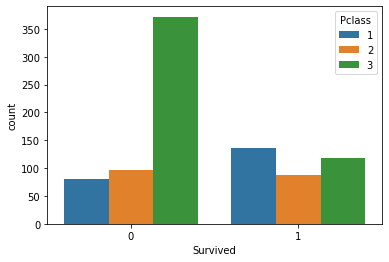

In [12]:
sns.countplot(survived, hue = pclass)

In [13]:
y = dataset["Survived"]

In [14]:
X = dataset[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Cabin', 'Embarked'] ]

In [15]:
X.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,True,False
889,False,False,False,False,False,False,False,False


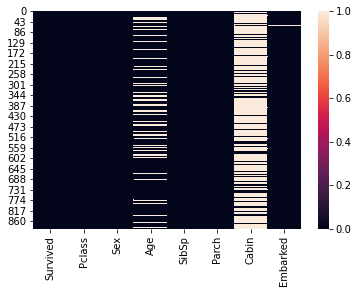

In [16]:
sns.heatmap(X.isnull())

In [17]:
# Feature Elimination
X.drop('Cabin', axis = 1, inplace = True)

C:\Users\sargam\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
X.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


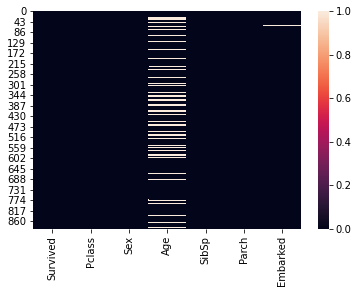

In [19]:
sns.heatmap(X.isnull())

In [20]:
age = dataset["Age"]

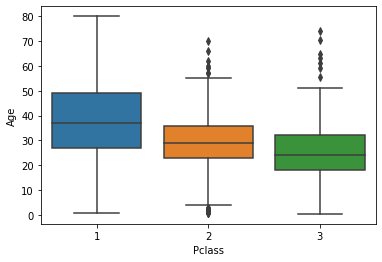

In [21]:
# Data Imputation
sns.boxplot(pclass, age)

In [22]:
def lw(cols):
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
        else:
            return 30
    else:
        return age

In [23]:
age = dataset[["Pclass", "Age"]].apply(lw, axis = 1)

In [24]:
pd.isnull(age)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [25]:
X["Age"] = age

<ipython-input-25-50712bfa6c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = age


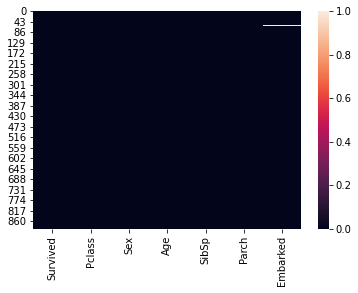

In [26]:
sns.heatmap(X.isnull())

In [40]:
X.shape

(891, 7)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [28]:
sex = X["Sex"]

In [29]:
# Convert into Dummy Variables
sex = pd.get_dummies(sex, drop_first = True)
sex.head(3)

,male
0,1
1,0
2,0


In [30]:
pclass = X["Pclass"]

In [31]:
pclass = pd.get_dummies(pclass, drop_first = True)
pclass.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [32]:
sibsp = X["SibSp"]

In [33]:
sibsp = pd.get_dummies(sibsp, drop_first = True)
sibsp.head(3)

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0


In [34]:
parch = X["Parch"]

In [35]:
parch = pd.get_dummies(parch, drop_first = True)
parch.head(3)

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0


In [63]:
embarked = X["Embarked"]

In [64]:
embarked = pd.get_dummies(embarked, drop_first = True)
embarked.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [65]:
# Concatenation
final_dataset = pd.concat([age, sex, pclass, sibsp, parch, embarked, y], axis = 1)
final_dataset.shape

(891, 19)

In [66]:
# Drop all NaN Records
final_dataset = final_dataset.dropna()
final_dataset.shape

(891, 19)

In [67]:
final_dataset.head(3)

,0,male,2,3,1,2,3,4,5,8,1,2,3,4,5,6,Q,S,Survived
0,22.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,38.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [70]:
y = final_dataset["Survived"]
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [71]:
X_final = final_dataset.iloc[:,0:-1]
X_final.head(3)

,0,male,2,3,1,2,3,4,5,8,1,2,3,4,5,6,Q,S
0,22.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_final, y)

C:\Users\sargam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
model.coef_

array([[-0.0366042 , -2.51998914, -0.97128169, -2.1660964 ,  0.1352663 ,
        -0.13895512, -1.31612919, -0.91864845, -0.55923395, -0.85493362,
         0.30974134, -0.16247587,  0.15306985, -0.62907213, -0.45045955,
        -0.26226958, -0.08922464, -0.47394493]])